<a href="https://colab.research.google.com/github/Soundarya2913/2module/blob/master/prediction_of_sales_revenue_on_ad_through_social_medias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict the sales revenue on advertising through social medias**

loading the data--->multiple Linear Regression Model--->feature selection--->train and test data split--->interaction effect in regression analysis

In [ ]:
import numpy as np # numerical calculation
import pandas as pd # data frame
import seaborn as sns # data visualisation and creating statistical figure
from scipy.stats import skew # statistical function
%matplotlib inline # sets the backend matplot in to inline backend

In [ ]:
import matplotlib.pyplot as plt # collection of functions that makes some changes to create figure
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

Loading the Data

In [ ]:
data = pd.read_csv('advertising.csv')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


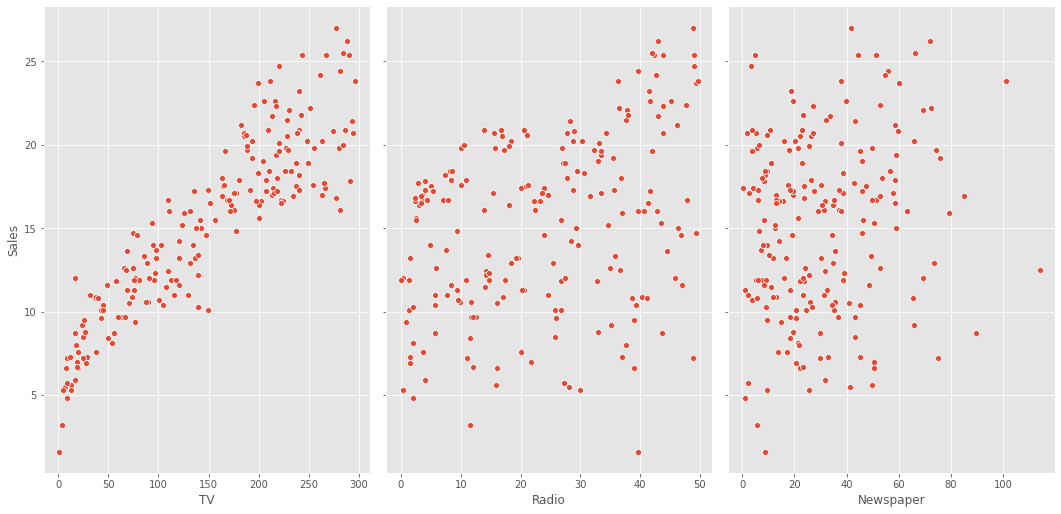

In [ ]:
sns.pairplot(data,x_vars = ['TV' , 'Radio' , 'Newspaper'],y_vars = ['Sales'] , height = 7 ,aspect = 0.7);

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[['TV' , 'Radio' , 'Newspaper']]
y = data.Sales

lm1 = LinearRegression()
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [ ]:
list(zip(['TV' , 'Radio' , 'Newspaper'],lm1.coef_))

[('TV', 0.05444578033757095),
 ('Radio', 0.10700122823870292),
 ('Newspaper', 0.00033565792233056224)]

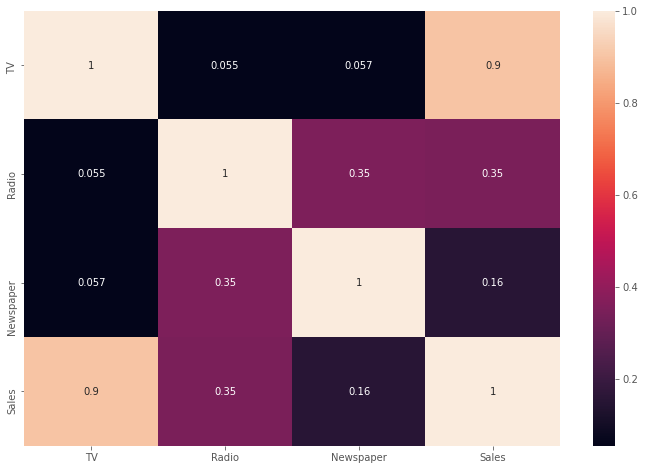

In [ ]:
sns.heatmap(data.corr(),annot = True);

In [ ]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV' , 'Radio']],y)
lm2_pred = lm2.predict(X[['TV' , 'Radio']])

print("R^2 : ",r2_score(y, lm2_pred))

R^2 :  0.9025896186081139


In [ ]:
lm3 = LinearRegression().fit(X[['TV' , 'Radio','Newspaper']],y)
lm3_pred = lm3.predict(X[['TV' , 'Radio' , 'Newspaper']])

print("R^2 : ",r2_score(y, lm3_pred))

R^2 :  0.9025912899684558


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['TV' , 'Radio','Newspaper']]
y = data.Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_pred = lm4.predict(X_test)

print("RMSE : ",np.sqrt(mean_squared_error(y_test, lm4_pred)))
print("R^2 : ", r2_score(y_test, lm4_pred))

RMSE :  1.5096109295725835
R^2 :  0.9048917241361681


In [ ]:
X = data[['TV' , 'Radio']]
y = data.Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_pred = lm5.predict(X_test)

print("RMSE : ",np.sqrt(mean_squared_error(y_test, lm5_pred)))
print("R^2 : ", r2_score(y_test, lm5_pred))

RMSE :  1.5092481618667395
R^2 :  0.9049374287145224


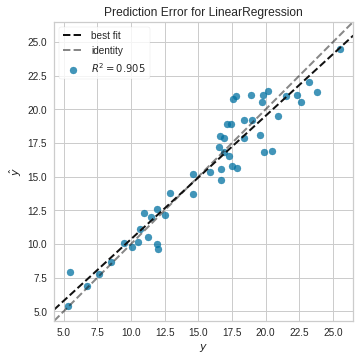

In [ ]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();

In [ ]:
data['interaction'] = data['TV']*data['Radio']
X = data[['TV' , 'Radio','interaction']]
y = data.Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_pred = lm6.predict(X_test)

print("RMSE : ",np.sqrt(mean_squared_error(y_test, lm6_pred)))
print("R^2 : ", r2_score(y_test, lm6_pred))

RMSE :  1.4364900270985008
R^2 :  0.9138820909970508
